In [1]:
import importlib
import RNN
from RNN import *
importlib.reload(RNN)

<module 'RNN' from 'C:\\Users\\siqia\\Documents\\GitHub\\two_and_a_half_cs_majors\\RNN\\RNN.py'>

In [2]:
path = 'data/us/covid/nyt_us_counties_daily.csv'
counties_df = load_county_data(path)

In [3]:
counties_df.head()

,fips,date,county,state,cases,deaths,states_encoded,total_pop,60plus,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",samples,m50,m50_index
0,53061,2020-01-21,Snohomish,Washington,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",771904.0,143234.0,7.8,23.8,36.6,31.9,0.0,0.0,0.0
1,53061,2020-01-22,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",771904.0,143234.0,7.8,23.8,36.6,31.9,0.0,0.0,0.0
2,53061,2020-01-23,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",771904.0,143234.0,7.8,23.8,36.6,31.9,0.0,0.0,0.0
3,53061,2020-01-24,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",771904.0,143234.0,7.8,23.8,36.6,31.9,0.0,0.0,0.0
4,53061,2020-01-25,Snohomish,Washington,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",771904.0,143234.0,7.8,23.8,36.6,31.9,0.0,0.0,0.0


In [4]:
daterange = generate_date_range(counties_df, dateshift=35)
split_point = generate_split_point(daterange, frac = 0.8)

FIPS processed: 0/2858
FIPS processed: 250/2858
FIPS processed: 500/2858
FIPS processed: 750/2858
FIPS processed: 1000/2858
FIPS processed: 1250/2858
FIPS processed: 1500/2858
FIPS processed: 1750/2858
FIPS processed: 2000/2858
FIPS processed: 2250/2858
FIPS processed: 2500/2858
FIPS processed: 2750/2858


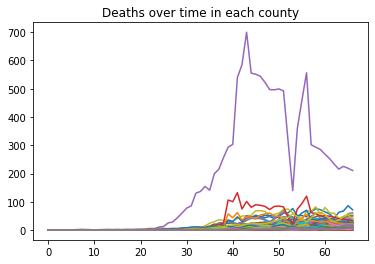

<Figure size 432x288 with 0 Axes>

In [5]:
train_inputs, train_targets, train_conditions, test_inputs, \
    test_targets, test_conditions, inputs_total, conditions_total, fips_many, fips_few \
    = generate_county_sets(counties_df, daterange, split_point=split_point)

In [6]:
print(train_inputs.shape)
print(train_targets.shape)
print(train_conditions.shape)

(8938, 12, 3)
(8938, 3)
(8938, 58)


In [7]:
print(test_inputs.shape)
print(test_targets.shape)
print(test_conditions.shape)

(436, 12, 3)
(436, 3)
(436, 58)


In [8]:
# For some reason, it won't let me make a model here? so the
# model is made in RNN.py and imported.
# model = MySimpleModel()

model, history = train_rnn(model, train_inputs, train_targets,
                           train_conditions, test_inputs,
                           test_targets, test_conditions, ep = 6)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train on 8938 sa

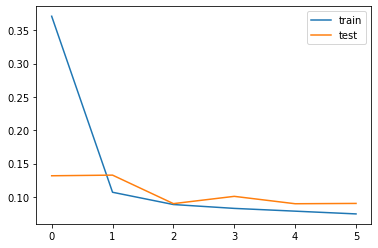

In [9]:
plot_loss(history)

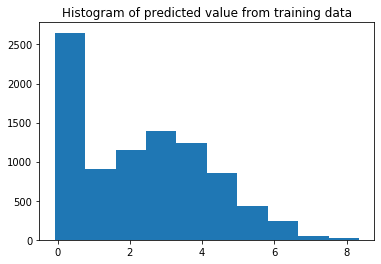

In [10]:
plot_hist(model, train_inputs, train_conditions)

In [11]:
nyc = fips_many.index(36061)
la = fips_many.index(6037)
snoho = fips_many.index(53061)

Generating predictions:


[0.69314718 0.         0.         0.         0.         1.60943791
 0.         1.38629436 1.60943791 0.         0.69314718 0.
 0.         1.09861229 0.69314718]
[0.         0.         0.69314718 0.         0.         0.69314718
 0.         0.         0.         0.         0.         0.
 1.09861229 0.         0.        ]


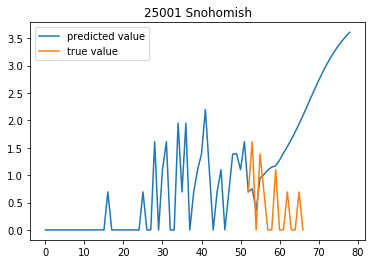

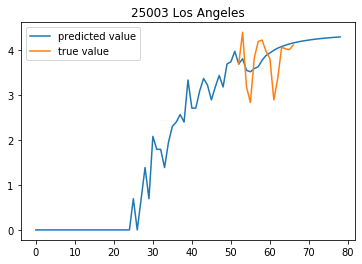

<Figure size 432x288 with 0 Axes>

In [12]:
plot_predicted_vs_true(model, inputs_total, conditions_total, counties_df, fips_many, split_point, 25, [snoho, la])

In [13]:
import sys
sys.path.insert(1, '../benchmark_models')

import utils

In [14]:
inputs, predictions = generate_predictions_county_level(model, inputs_total, conditions_total, 60, range(len(fips_many)))

Generating predictions:


In [15]:
from datetime import datetime
out_dates = utils.all_output_dates()

In [16]:
out_fips, all_row_starts = utils.all_output_fips('sample_submission.csv')
num_dates, num_fips = len(out_dates), len(out_fips)
out = np.zeros((num_dates * num_fips, 9))

end_date = datetime.strptime(max(out_dates), '%Y-%m-%d') 
time_dif = (end_date - max(daterange)).days


In [41]:
time_dif = 91
new_values = np.exp(inputs[:, -time_dif:, 1])
fips_timeseries_dict = dict()

for i in range(len(fips_many)):
    fips_timeseries_dict[str(fips_many[i])] = new_values[i]
for j in range(len(fips_few)):
    fips_timeseries_dict[str(fips_few[j])] = np.random.randint(5, size=time_dif)

In [51]:
from scipy.stats import norm

def generate_normal_quants(timeseries_data, std_frac = 0.3):
    '''
    for timeseries of length n, returns n by 10 matrix, where there are 10 quartiles
    '''
    n = len(timeseries_data)
    output = np.zeros((n, 9))
        
    for i in range(1, 10):
        mean = timeseries_data
        stand_dev = std_frac * mean
        output[:,(i - 1)] = mean + norm.ppf(i/10) * stand_dev
        
    return output

available_fips = fips_timeseries_dict.keys()

out_file = 'sample_submission.csv'

for fi, fips in enumerate(out_fips):
    print('Processing FIPS', fips)
    if fips in available_fips:
        preds = generate_normal_quants(fips_timeseries_dict[fips])
    else:
        preds = np.zeros((time_dif, 9))
    
    # Indices are disjointed because we're recording a single FIPS on many different dates
    out[np.arange(fi, out.shape[0], num_fips)] = preds
# Add in the header line
out_lines = [','.join(['id'] + ['%d' % x for x in np.arange(10, 91, 10)]) + '\n']
# Add in all other lines one at a time
for row_head, row in zip(all_row_starts, out):
    out_lines.append(','.join([row_head] + ['%.2f' % val for val in row]) + '\n')
with open(out_file, 'w') as f:
    f.writelines(out_lines)
f.close()


Processing FIPS 10001
Processing FIPS 10003
Processing FIPS 10005
Processing FIPS 1001
Processing FIPS 1003
Processing FIPS 1005
Processing FIPS 1007
Processing FIPS 1009
Processing FIPS 1011
Processing FIPS 1013
Processing FIPS 1015
Processing FIPS 1017
Processing FIPS 1019
Processing FIPS 1021
Processing FIPS 1023
Processing FIPS 1025
Processing FIPS 1027
Processing FIPS 1029
Processing FIPS 1031
Processing FIPS 1033
Processing FIPS 1035
Processing FIPS 1037
Processing FIPS 1039
Processing FIPS 1041
Processing FIPS 1043
Processing FIPS 1045
Processing FIPS 1047
Processing FIPS 1049
Processing FIPS 1051
Processing FIPS 1053
Processing FIPS 1055
Processing FIPS 1057
Processing FIPS 1059
Processing FIPS 1061
Processing FIPS 1063
Processing FIPS 1065
Processing FIPS 1067
Processing FIPS 1069
Processing FIPS 1071
Processing FIPS 1073
Processing FIPS 1075
Processing FIPS 1077
Processing FIPS 1079
Processing FIPS 1081
Processing FIPS 1083
Processing FIPS 1085
Processing FIPS 1087
Processing

Processing FIPS 17131
Processing FIPS 17133
Processing FIPS 17135
Processing FIPS 17137
Processing FIPS 17139
Processing FIPS 17141
Processing FIPS 17143
Processing FIPS 17145
Processing FIPS 17147
Processing FIPS 17149
Processing FIPS 17151
Processing FIPS 17153
Processing FIPS 17155
Processing FIPS 17157
Processing FIPS 17159
Processing FIPS 17161
Processing FIPS 17163
Processing FIPS 17165
Processing FIPS 17167
Processing FIPS 17169
Processing FIPS 17171
Processing FIPS 17173
Processing FIPS 17175
Processing FIPS 17177
Processing FIPS 17179
Processing FIPS 17181
Processing FIPS 17183
Processing FIPS 17185
Processing FIPS 17187
Processing FIPS 17189
Processing FIPS 17191
Processing FIPS 17193
Processing FIPS 17195
Processing FIPS 17197
Processing FIPS 17199
Processing FIPS 17201
Processing FIPS 17203
Processing FIPS 18001
Processing FIPS 18003
Processing FIPS 18005
Processing FIPS 18007
Processing FIPS 18009
Processing FIPS 18011
Processing FIPS 18013
Processing FIPS 18015
Processing

Processing FIPS 21087
Processing FIPS 21089
Processing FIPS 21091
Processing FIPS 21093
Processing FIPS 21095
Processing FIPS 21097
Processing FIPS 21099
Processing FIPS 2110
Processing FIPS 21101
Processing FIPS 21103
Processing FIPS 21105
Processing FIPS 21107
Processing FIPS 21109
Processing FIPS 21111
Processing FIPS 21113
Processing FIPS 21115
Processing FIPS 21117
Processing FIPS 21119
Processing FIPS 21121
Processing FIPS 21123
Processing FIPS 21125
Processing FIPS 21127
Processing FIPS 21129
Processing FIPS 21131
Processing FIPS 21133
Processing FIPS 21135
Processing FIPS 21137
Processing FIPS 21139
Processing FIPS 21141
Processing FIPS 21143
Processing FIPS 21145
Processing FIPS 21147
Processing FIPS 21149
Processing FIPS 21151
Processing FIPS 21153
Processing FIPS 21155
Processing FIPS 21157
Processing FIPS 21159
Processing FIPS 21161
Processing FIPS 21163
Processing FIPS 21165
Processing FIPS 21167
Processing FIPS 21169
Processing FIPS 21171
Processing FIPS 21173
Processing 

Processing FIPS 28021
Processing FIPS 28023
Processing FIPS 28025
Processing FIPS 28027
Processing FIPS 28029
Processing FIPS 28031
Processing FIPS 28033
Processing FIPS 28035
Processing FIPS 28037
Processing FIPS 28039
Processing FIPS 28041
Processing FIPS 28043
Processing FIPS 28045
Processing FIPS 28047
Processing FIPS 28049
Processing FIPS 28051
Processing FIPS 28053
Processing FIPS 28055
Processing FIPS 28057
Processing FIPS 28059
Processing FIPS 28061
Processing FIPS 28063
Processing FIPS 28065
Processing FIPS 28067
Processing FIPS 28069
Processing FIPS 28071
Processing FIPS 28073
Processing FIPS 28075
Processing FIPS 28077
Processing FIPS 28079
Processing FIPS 28081
Processing FIPS 28083
Processing FIPS 28085
Processing FIPS 28087
Processing FIPS 28089
Processing FIPS 28091
Processing FIPS 28093
Processing FIPS 28095
Processing FIPS 28097
Processing FIPS 28099
Processing FIPS 28101
Processing FIPS 28103
Processing FIPS 28105
Processing FIPS 28107
Processing FIPS 28109
Processing

Processing FIPS 35007
Processing FIPS 35009
Processing FIPS 35011
Processing FIPS 35013
Processing FIPS 35015
Processing FIPS 35017
Processing FIPS 35019
Processing FIPS 35021
Processing FIPS 35023
Processing FIPS 35025
Processing FIPS 35027
Processing FIPS 35028
Processing FIPS 35029
Processing FIPS 35031
Processing FIPS 35033
Processing FIPS 35035
Processing FIPS 35037
Processing FIPS 35039
Processing FIPS 35041
Processing FIPS 35043
Processing FIPS 35045
Processing FIPS 35047
Processing FIPS 35049
Processing FIPS 35051
Processing FIPS 35053
Processing FIPS 35055
Processing FIPS 35057
Processing FIPS 35059
Processing FIPS 35061
Processing FIPS 36001
Processing FIPS 36003
Processing FIPS 36005
Processing FIPS 36007
Processing FIPS 36009
Processing FIPS 36011
Processing FIPS 36013
Processing FIPS 36015
Processing FIPS 36017
Processing FIPS 36019
Processing FIPS 36021
Processing FIPS 36023
Processing FIPS 36025
Processing FIPS 36027
Processing FIPS 36029
Processing FIPS 36031
Processing

Processing FIPS 40083
Processing FIPS 40085
Processing FIPS 40087
Processing FIPS 40089
Processing FIPS 4009
Processing FIPS 40091
Processing FIPS 40093
Processing FIPS 40095
Processing FIPS 40097
Processing FIPS 40099
Processing FIPS 40101
Processing FIPS 40103
Processing FIPS 40105
Processing FIPS 40107
Processing FIPS 40109
Processing FIPS 4011
Processing FIPS 40111
Processing FIPS 40113
Processing FIPS 40115
Processing FIPS 40117
Processing FIPS 40119
Processing FIPS 4012
Processing FIPS 40121
Processing FIPS 40123
Processing FIPS 40125
Processing FIPS 40127
Processing FIPS 40129
Processing FIPS 4013
Processing FIPS 40131
Processing FIPS 40133
Processing FIPS 40135
Processing FIPS 40137
Processing FIPS 40139
Processing FIPS 40141
Processing FIPS 40143
Processing FIPS 40145
Processing FIPS 40147
Processing FIPS 40149
Processing FIPS 4015
Processing FIPS 40151
Processing FIPS 40153
Processing FIPS 4017
Processing FIPS 4019
Processing FIPS 4021
Processing FIPS 4023
Processing FIPS 402

Processing FIPS 48023
Processing FIPS 48025
Processing FIPS 48027
Processing FIPS 48029
Processing FIPS 48031
Processing FIPS 48033
Processing FIPS 48035
Processing FIPS 48037
Processing FIPS 48039
Processing FIPS 48041
Processing FIPS 48043
Processing FIPS 48045
Processing FIPS 48047
Processing FIPS 48049
Processing FIPS 48051
Processing FIPS 48053
Processing FIPS 48055
Processing FIPS 48057
Processing FIPS 48059
Processing FIPS 48061
Processing FIPS 48063
Processing FIPS 48065
Processing FIPS 48067
Processing FIPS 48069
Processing FIPS 48071
Processing FIPS 48073
Processing FIPS 48075
Processing FIPS 48077
Processing FIPS 48079
Processing FIPS 48081
Processing FIPS 48083
Processing FIPS 48085
Processing FIPS 48087
Processing FIPS 48089
Processing FIPS 48091
Processing FIPS 48093
Processing FIPS 48095
Processing FIPS 48097
Processing FIPS 48099
Processing FIPS 48101
Processing FIPS 48103
Processing FIPS 48105
Processing FIPS 48107
Processing FIPS 48109
Processing FIPS 48111
Processing

Processing FIPS 5113
Processing FIPS 51131
Processing FIPS 51133
Processing FIPS 51135
Processing FIPS 51137
Processing FIPS 51139
Processing FIPS 51141
Processing FIPS 51143
Processing FIPS 51145
Processing FIPS 51147
Processing FIPS 51149
Processing FIPS 5115
Processing FIPS 51153
Processing FIPS 51155
Processing FIPS 51157
Processing FIPS 51159
Processing FIPS 51161
Processing FIPS 51163
Processing FIPS 51165
Processing FIPS 51167
Processing FIPS 51169
Processing FIPS 5117
Processing FIPS 51171
Processing FIPS 51173
Processing FIPS 51175
Processing FIPS 51177
Processing FIPS 51179
Processing FIPS 51181
Processing FIPS 51183
Processing FIPS 51185
Processing FIPS 51187
Processing FIPS 5119
Processing FIPS 51191
Processing FIPS 51193
Processing FIPS 51195
Processing FIPS 51197
Processing FIPS 51199
Processing FIPS 5121
Processing FIPS 5123
Processing FIPS 5125
Processing FIPS 5127
Processing FIPS 5129
Processing FIPS 5131
Processing FIPS 5133
Processing FIPS 5135
Processing FIPS 5137
P

Processing FIPS 8113
Processing FIPS 8115
Processing FIPS 8117
Processing FIPS 8119
Processing FIPS 8121
Processing FIPS 8123
Processing FIPS 8125
Processing FIPS 9001
Processing FIPS 9003
Processing FIPS 9005
Processing FIPS 9007
Processing FIPS 9009
Processing FIPS 9011
Processing FIPS 9013
Processing FIPS 9015
